### 16-04-2020

* basics of decision tree
* introduction to decision boundry 
* decision tree for classification 
* Introduction to entropy


In [14]:
from sklearn.datasets import make_blobs

In [15]:
X,Y = make_blobs(n_features = 2,n_samples = 1000,cluster_std =.8,centers=4,random_state = 6)

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


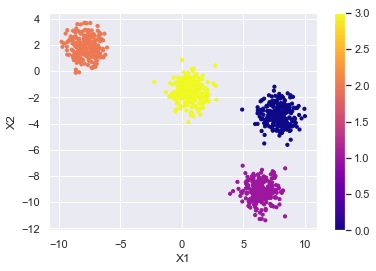

In [63]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y,cmap="plasma")
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar()


### Fundamentals of decission tree
* It is a supervised Algorith _ For classification and regession
* decision tree algo generates a decession tree for predicyion

* leafs are decions 
* DT dont work direvtly on continues feature data
* it translates continues data into categorical data



In [33]:
X[:5]

array([[ 9.25784958, -2.82526517],
       [ 0.96889603, -1.63014501],
       [-8.2630645 ,  0.90588073],
       [-7.85737757,  2.17665695],
       [-8.28000833,  1.98407695]])

In [34]:
Y[:5]

array([0, 3, 2, 2, 2])

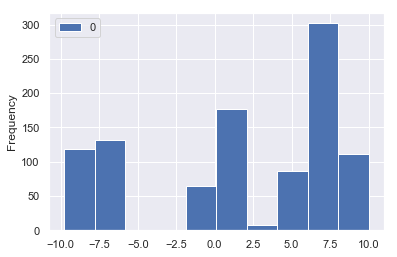

In [35]:
pd.DataFrame(X[:,0]).plot.hist()

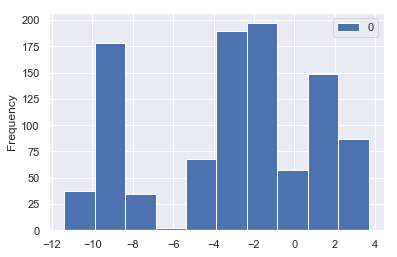

In [36]:
pd.DataFrame(X[:,1]).plot.hist()

In [37]:
df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1]})

In [38]:
df['Target'] = Y

In [39]:
df.sample(10)

,X1,X2,Target
883,0.681391,-1.365638,3
842,-7.737111,1.630179,2
442,-8.464940,1.480633,2
325,-7.768242,1.751775,2
119,-7.790375,2.447079,2
849,-7.198870,1.353798,2
303,-7.592331,3.146243,2
28,7.933932,-9.776886,1
826,0.885004,-2.427261,3
929,7.021759,-3.335137,0


### converting X1 column to categorical column


In [40]:
def f(v):
    if v < -7:
        return 
    elif v < 2.5:
        return 2
    else:
        return 3
df['X1_cat'] = df.X1.map(f)

In [42]:
def f(v):
    if v < -4:
        return "One"
    elif v < -1:
        return "Two"
    else:
        return "Three"
df['X2_cat'] = df.X2.map(f)

In [43]:
df.sample(5)

,X1,X2,Target,X1_cat,X2_cat
741,8.049520,-9.224747,1,3.0,One
370,4.607910,-8.991628,1,3.0,One
30,-6.841560,3.456198,2,2.0,Three
963,-7.370253,1.653267,2,NaN,Three
210,0.244459,-1.300803,3,2.0,Two


In [30]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [31]:
dt = DecisionTreeClassifier(criterion="entropy")

In [47]:
dt.fit(df[['X1','X2']],df.Target)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
export_graphviz(dt,'dt.tree')

In [49]:
import numpy as np
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))


In [50]:
outcome = dt.predict(np.c_[xx.ravel(), yy.ravel()])


In [51]:
outcome

array([2, 2, 2, ..., 0, 0, 0])

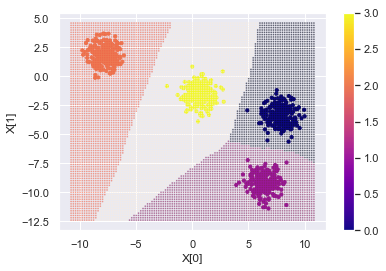

In [64]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y,cmap="plasma")
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()
#0 - purple
#1 - blue
#2 - Green

plt.scatter(xx.ravel(),yy.ravel(),c=outcome,alpha=.5,s=.5)


In [54]:
from sklearn.neighbors import KNeighborsClassifier


In [55]:
knc = KNeighborsClassifier()


In [56]:
knc.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
outcome = knc.predict(np.c_[xx.ravel(), yy.ravel()])

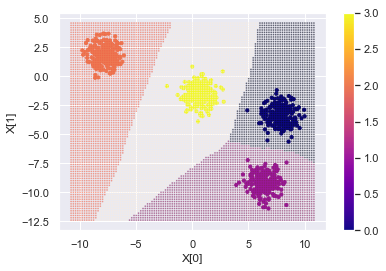

In [65]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y,cmap="plasma")
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()
#0 - purple
#1 - blue
#2 - Green

plt.scatter(xx.ravel(),yy.ravel(),c=outcome,alpha=.5,s=.5)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr = LogisticRegression()

In [68]:
lr.fit(X,Y)

C:\Users\saket\Anaconda333\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saket\Anaconda333\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
outcome = lr.predict(np.c_[xx.ravel(), yy.ravel()])

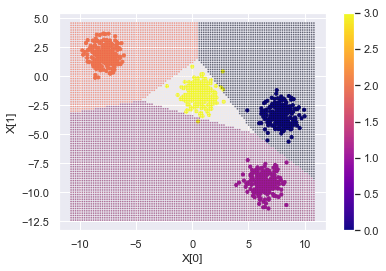

In [71]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y,cmap='plasma')
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()
#0 - purple
#1 - blue
#2 - Green
#3 - Yellow
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,alpha=.5,s=.5)

In [72]:
from sklearn.datasets import load_digitsplt.imshow(digits.images[0],cmap='gray')


In [73]:
digits = load_digits()

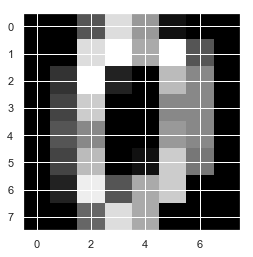

In [74]:
plt.imshow(digits.images[0],cmap='gray')


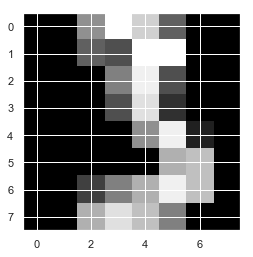

In [75]:
plt.imshow(digits.images[45],cmap='gray')

In [76]:
digits.target[45]

3

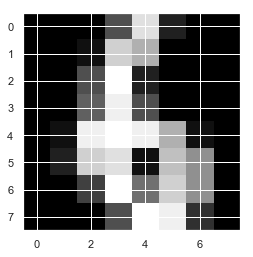

In [77]:
plt.imshow(digits.images[34],cmap='gray')

In [78]:
digits.target[34]

6

* trainng data for scikit is always in vector format and not matrix format
* digits.images is in matrix format
* digits.data is the row version of matrix ,this scikit understand
* each pixel is ine feature

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)
dt = DecisionTreeClassifier()


In [82]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
export_graphviz(dt,'dt2.tree')

In [84]:
dt.score(testX,testY)

0.8733333333333333

In [85]:
tennis_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/tennis.csv.txt')

In [86]:
tennis_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [87]:
from sklearn.preprocessing import OrdinalEncoder

In [88]:
oe = OrdinalEncoder()

In [89]:
feature = oe.fit_transform(tennis_data.drop(columns=['play']))

In [90]:
dt = DecisionTreeClassifier(criterion='entropy')

In [91]:
dt.fit(feature, tennis_data.play)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [92]:
oe.categories_

[array(['overcast', 'rainy', 'sunny'], dtype=object),
 array(['cool', 'hot', 'mild'], dtype=object),
 array(['high', 'normal'], dtype=object),
 array([False, True], dtype=object)]

In [93]:
feature

array([[2., 1., 0., 0.],
       [2., 1., 0., 1.],
       [0., 1., 0., 0.],
       [1., 2., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 1.],
       [0., 0., 1., 1.],
       [2., 2., 0., 0.],
       [2., 0., 1., 0.],
       [1., 2., 1., 0.],
       [2., 2., 1., 1.],
       [0., 2., 0., 1.],
       [0., 1., 1., 0.],
       [1., 2., 0., 1.]])

In [94]:
export_graphviz(dt,'dt3.tree',feature_names=['outlook','temp','humidity','windy'])

In [95]:
tennis_data.play

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

In [96]:
dt.predict([[1,0,1,0]])

array(['yes'], dtype=object)

In [97]:
dt.predict([[1,0,1,1]])

array(['no'], dtype=object)

* Note :
* Decision Trees are highly interpretable, what this means is - you can explain anybody why your model took the decision
* This is known as model interpretation